# Importing Libraries 

In [14]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#  Importing Data 

In [15]:
data=pd.read_csv('Company_Data.csv')

In [16]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# DATA UNDERSTANDING 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [18]:
data.shape

(400, 11)

In [19]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [20]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [21]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

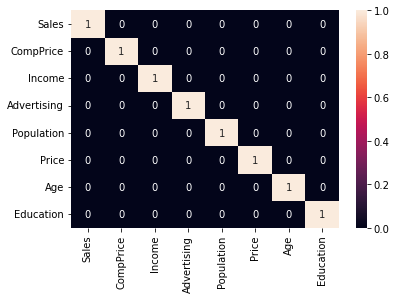

In [23]:
import seaborn as sns
sns.heatmap(data.corr()>0.6, annot = True)
plt.show()

<AxesSubplot:>

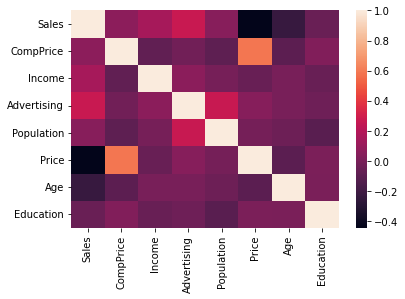

In [24]:
sns.heatmap(data.corr())

# DATA PREPROCESSING

In [25]:
data['ShelveLoc'].unique(),data['Urban'].unique(),data['US'].unique()

(array(['Bad', 'Good', 'Medium'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
data['ShelveLoc'] = le.fit_transform(data['ShelveLoc'])
data['Urban'] = le.fit_transform(data['Urban'])
data['US'] = le.fit_transform(data['US'])

In [28]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [29]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [30]:
data.insert(11,"sales_variable",'')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_variable
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,
396,6.14,139,23,3,37,120,2,55,11,0,1,
397,7.41,162,26,12,368,159,2,40,18,1,1,
398,5.94,100,79,7,284,95,0,50,12,1,1,


In [31]:
for i in range(0,len(data['Sales'])):
    if data['Sales'][i]>=11.0:
        data['sales_variable'][i] = 'High'
    elif data['Sales'][i]<=6.0:
        data['sales_variable'][i] = 'Low'
    else:
        data['sales_variable'][i] = 'Medium'

In [32]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_variable
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Medium
397,7.41,162,26,12,368,159,2,40,18,1,1,Medium
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


# MODEL BUILDING 

In [33]:
x = data.drop(labels=['sales_variable','Sales'],axis=1)
y = data['sales_variable']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12,stratify=y)

# model training 

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pred = dt.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
accuracy_score(y_test,y_pred)

0.675

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.42      0.50      0.45        10
         Low       0.73      0.73      0.73        26
      Medium       0.71      0.68      0.70        44

    accuracy                           0.68        80
   macro avg       0.62      0.64      0.63        80
weighted avg       0.68      0.68      0.68        80



In [40]:
confusion_matrix(y_test,y_pred)

array([[ 5,  0,  5],
       [ 0, 19,  7],
       [ 7,  7, 30]], dtype=int64)

In [41]:
import matplotlib.pyplot as plt

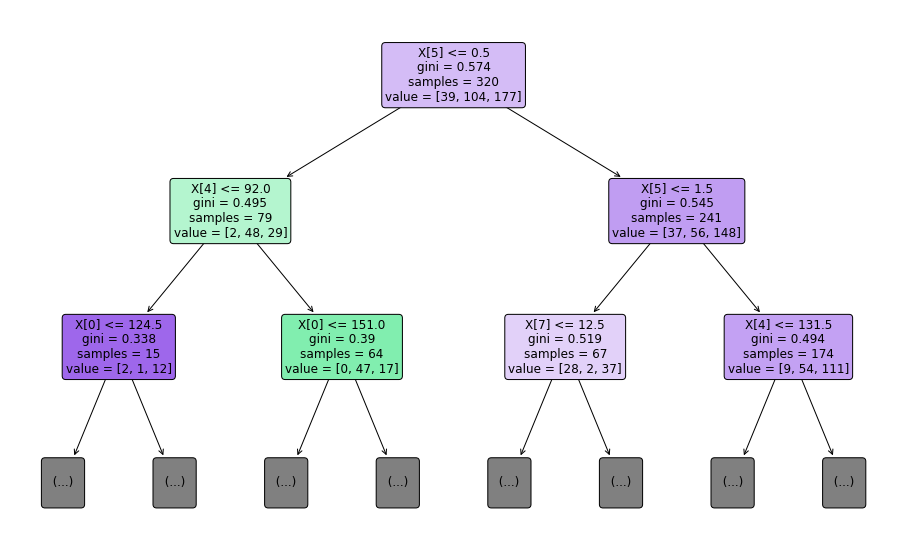

In [42]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dt,filled=True,rounded=True,max_depth=2,fontsize=12)
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=dt,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4]})
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4}
0.68125


In [44]:
dt_cv=DecisionTreeClassifier(max_depth=8,min_samples_leaf=1)
dt_cv.fit(x_train,y_train)
y_pred=dt_cv.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.65


In [45]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=DecisionTreeClassifier())
rfe.fit(x_train,y_train)


RFE(estimator=DecisionTreeClassifier())

In [46]:
rfe.get_support()

array([ True,  True,  True, False,  True,  True, False, False, False,
       False])

In [47]:
rfe_features = x_train.columns[rfe.get_support()]
rfe_features

Index(['CompPrice', 'Income', 'Advertising', 'Price', 'ShelveLoc'], dtype='object')

In [48]:
x_train_transform_rfe = rfe.transform(x_train)
x_test_transform_rfe = rfe.transform(x_test)

In [49]:
rfe_model = DecisionTreeClassifier()
rfe_model.fit(x_train_transform_rfe,y_train)

DecisionTreeClassifier()

In [50]:
y_pred_rfe = rfe_model.predict(x_test_transform_rfe)

In [51]:
print('accuracy score is ',accuracy_score(y_test,y_pred_rfe))

accuracy score is  0.65


In [52]:
print('Confusion matrix is \n',confusion_matrix(y_test,y_pred_rfe))

Confusion matrix is 
 [[ 4  0  6]
 [ 1 17  8]
 [ 7  6 31]]


In [53]:
print('classification report \n',classification_report(y_test,y_pred_rfe))

classification report 
               precision    recall  f1-score   support

        High       0.33      0.40      0.36        10
         Low       0.74      0.65      0.69        26
      Medium       0.69      0.70      0.70        44

    accuracy                           0.65        80
   macro avg       0.59      0.59      0.58        80
weighted avg       0.66      0.65      0.65        80



In [54]:
imp_feature_rfe=rfe_model.feature_importances_

In [55]:
rfe_data=pd.DataFrame({'feature':rfe_features,'imp_feature':imp_feature_rfe})
rfe_data=rfe_data.sort_values('imp_feature')

In [56]:
import seaborn as sns

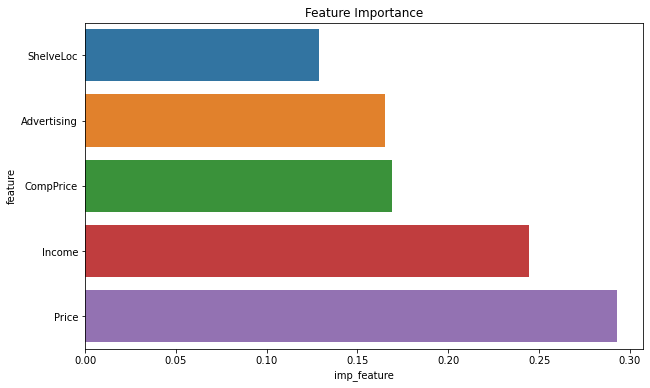

In [57]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=rfe_data)
plt.show()

# <u>========================================================================================================================== 